### 7.1 Handling Missing Data（处理缺失数据）

In [1]:
import numpy as np
import pandas as pd

In [2]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [3]:
string_data.isnull() # 检测NaN值，也称为sentinel value（哨兵值）

0    False
1    False
2     True
3    False
dtype: bool

In [5]:
# Python内置的None值在对象数组中也可以作为NA
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

缺省数据处理的函数：

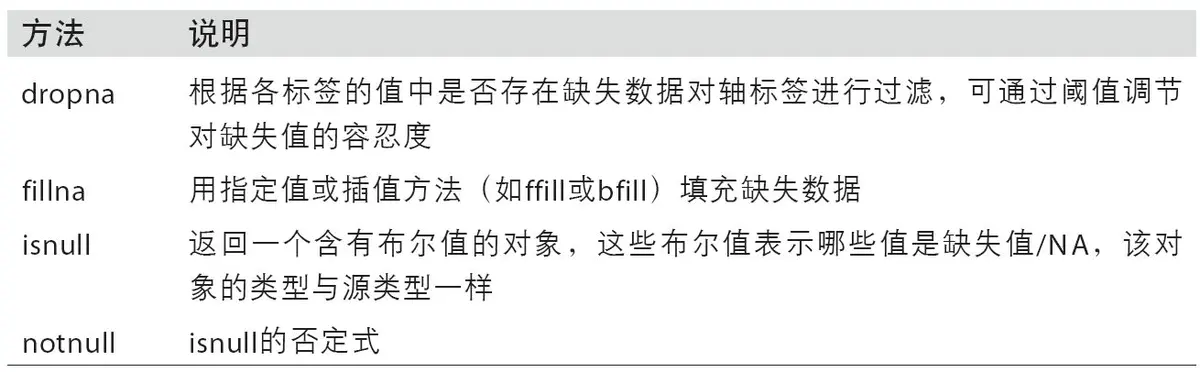

### Filtering Out Missing Data（过滤缺失数据）

In [6]:
from numpy import nan as NA

In [7]:
data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna() #对于Series，使用dropna返回一个仅含非空数据和索引值的Series

0    1.0
2    3.5
4    7.0
dtype: float64

In [8]:
# 等价于：
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [9]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])

In [11]:
cleaned = data.dropna() # dropna默认丢弃任何含有缺失值的行
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [12]:
cleaned

,0,1,2
0,1.0,6.5,3.0


In [13]:
data.dropna(how='all') # 传入how='all'将只丢弃全为NA的那些行

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [14]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [16]:
data.dropna(axis = 1, how = 'all') #丢弃columns

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [17]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,-0.951789,NaN,NaN
1,0.319954,NaN,NaN
2,-0.324248,NaN,0.103206
3,-1.616055,NaN,-1.032565
4,0.910310,-0.019945,0.953592
5,-1.619297,1.174175,-0.278650
6,-0.349605,-0.017347,0.604141


In [18]:
df.dropna()

,0,1,2
4,0.910310,-0.019945,0.953592
5,-1.619297,1.174175,-0.278650
6,-0.349605,-0.017347,0.604141


In [19]:
df.dropna(thresh = 2) # thresh参数保留部分NaN

,0,1,2
2,-0.324248,NaN,0.103206
3,-1.616055,NaN,-1.032565
4,0.910310,-0.019945,0.953592
5,-1.619297,1.174175,-0.278650
6,-0.349605,-0.017347,0.604141


### Filling In Missing Data（丢失数据填充）

In [20]:
df.fillna(0) # 将NaN替换为0

,0,1,2
0,-0.951789,0.000000,0.000000
1,0.319954,0.000000,0.000000
2,-0.324248,0.000000,0.103206
3,-1.616055,0.000000,-1.032565
4,0.910310,-0.019945,0.953592
5,-1.619297,1.174175,-0.278650
6,-0.349605,-0.017347,0.604141


In [21]:
df.fillna({1: 0.5, 2: 0})# 对不同的column填充不同值

,0,1,2
0,-0.951789,0.500000,0.000000
1,0.319954,0.500000,0.000000
2,-0.324248,0.500000,0.103206
3,-1.616055,0.500000,-1.032565
4,0.910310,-0.019945,0.953592
5,-1.619297,1.174175,-0.278650
6,-0.349605,-0.017347,0.604141


In [23]:
_ = df.fillna(0, inplace= True)# 对现有对象就地修改
df

,0,1,2
0,-0.951789,0.000000,0.000000
1,0.319954,0.000000,0.000000
2,-0.324248,0.000000,0.103206
3,-1.616055,0.000000,-1.032565
4,0.910310,-0.019945,0.953592
5,-1.619297,1.174175,-0.278650
6,-0.349605,-0.017347,0.604141


In [24]:
df = pd.DataFrame(np.random.randn(6, 3))

Object `df.reindexing` not found.
